## Matrix

Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.

The distance between two adjacent cells is 1.

 

Example 1:
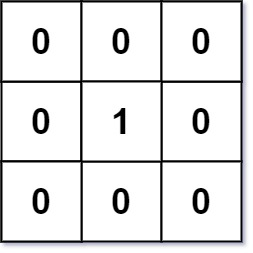

Input: mat = [[0,0,0],[0,1,0],[0,0,0]]
Output: [[0,0,0],[0,1,0],[0,0,0]]
Example 2:
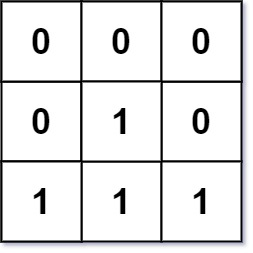

Input: mat = [[0,0,0],[0,1,0],[1,1,1]]
Output: [[0,0,0],[0,1,0],[1,2,1]]
 

Constraints:

m == mat.length
n == mat[i].length
1 <= m, n <= 104
1 <= m * n <= 104
mat[i][j] is either 0 or 1.
There is at least one 0 in mat.

## Solution Approach

<a href="https://ibb.co/VqwB9vf"><img src="https://i.ibb.co/TgWh2H9/IMG-9-F2-B01-D75-C29-1.jpg" alt="IMG-9-F2-B01-D75-C29-1" border="0"></a><br />

In [70]:
class Solution(object):
    def updateMatrix(self, mat):
        """
        :type mat: List[List[int]]
        :rtype: List[List[int]]
        """
        def isValid(r,c):
            if (r>=0 and r<m) and (c>=0 and c<n):
                return True
            return False
        
        m,n=len(mat),len(mat[0])
        dist=[]
        for i in range(m):
            col = []
            for j in range(n):
                col.append(-1)
            dist.append(col)
        queue=[] 
        for r in range(m):
            for c in range(n):
                if mat[r][c]==0:
                    queue.append((r,c))
                    dist[r][c]=0
                               
        while queue:
            r,c=queue.pop(0)
            neighbours=[(r,c+1),(r,c-1),(r+1,c),(r-1,c)]
            for n_r,n_c in neighbours:
                if isValid(n_r,n_c) and dist[n_r][n_c]==-1:
                    dist[n_r][n_c]=dist[r][c]+1
                    queue.append((n_r,n_c))
        return dist             
            
            
        

In [71]:
mat=[[1,1,1],[1,1,0]]
Solution().updateMatrix(mat)

[[3, 2, 1], [2, 1, 0]]

## Rotting Oranges

You are given an m x n grid where each cell can have one of three values:

0 representing an empty cell,
1 representing a fresh orange, or
2 representing a rotten orange.
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

 

Example 1:
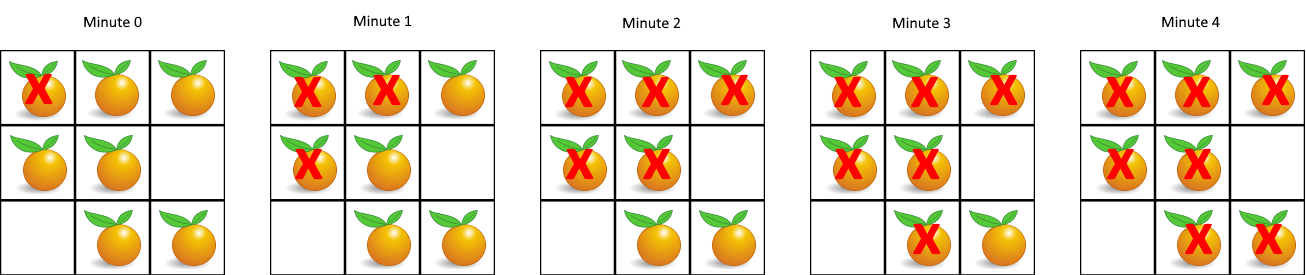

Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
Output: 4
Example 2:

Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
Output: -1
Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.
Example 3:

Input: grid = [[0,2]]
Output: 0
Explanation: Since there are already no fresh oranges at minute 0, the answer is just 0.
 

Constraints:

m == grid.length
n == grid[i].length
1 <= m, n <= 10
grid[i][j] is 0, 1, or 2

In [73]:
class Solution:
    def orangesRotting(self, grid):
        # method to check if the co-ordinate is valid
        def isValid(r,c):
            if (r>=0 and r<m) and (c>=0 and c<n):
                return True
            return False
        # initialize queue with rotten oranges
        # initialize other variables 
        m,n=len(grid),len(grid[0])
        queue=[]
        minTime,numOrange=0,0
        for i in range(m):
            for j in range(n):
                # if the orange is rotten, add it to queue
                if grid[i][j]==2:
                    queue.append((i,j)) 
                # update ornage count    
                if grid[i][j]==2 or grid[i][j]==1:
                    numOrange+=1
        # if there are no ornages, return 0            
        if   numOrange==0: return 0    
        # while the queue is not empty
        while queue:  
            # for each level of operation increase minTime
            # important : all adjacent neighbour of the current node are updated in next timestep
            minTime+=1
            # for each item of the queue
            for i in range(len(queue)):
                # get the current grid coordinate
                r,c=queue.pop(0)
                # if there are any fresh orange,update queue, mark it as rotten
                if isValid(r,c+1) and grid[r][c+1]==1:
                    grid[r][c+1]=2  
                    queue.append((r,c+1))
                if isValid(r+1,c) and grid[r+1][c]==1:
                    grid[r+1][c]=2
                    queue.append((r+1,c))
                if isValid(r-1,c) and grid[r-1][c]==1:
                    grid[r-1][c]=2 
                    queue.append((r-1,c))
                if isValid(r,c-1) and grid[r][c-1]==1:
                    grid[r][c-1]=2  
                    queue.append((r,c-1))  
        # check if there are any fresh orange left after the whole operation
        for i in range(m):
            for j in range(n):
                if grid[i][j]==1:
                    return -1
        return minTime-1        
        
        